#### Importing modules

In [1]:
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import json,pickle,requests,spacy,re,nltk
from spacytextblob.spacytextblob import SpacyTextBlob
from spacy.lang.en.stop_words import STOP_WORDS
import matplotlib.pyplot as plt
from collections import Counter
from sumy.parsers.html import HtmlParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer
from nltk.tokenize import sent_tokenize
import numpy as np
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/pasqualesalomone/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
pwd

'/Users/pasqualesalomone/Desktop/WebMining&NLP/Module7'

#### Scraping data from url

In [2]:
url="https://www.euronews.com/2023/07/18/disloyal-views-lithuania-strips-russians-residency-permits"

try:
    response = requests.get(url)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        #articles = soup.find_all("div", class_="c-article-content js-article-content poool-content")
        articles = soup.find_all("div", class_="c-article-content js-article-content poool-content")
        for article in articles:
            article_text = ""
            for element in article.contents:
        
                if element.name == "p" or (element.name == "div" and "figure" in element.get("class", [])):
                    article_text += element.get_text(separator=" ", strip=True) + " "
    
        print("Request successful!")
        print("-------------------")
        print(article_text)
    else:
            print("Request failed with status code:", response.status_code)

except requests.RequestException as e:
    print("An error occurred while making the request:", str(e))


Request successful!
-------------------
Lithuania has revoked the residency permits of more than 100 Russians living inside the country, deeming some a security threat. In figures shared with Euronews on Monday, the country's Migration Department said it had stripped 38 Russians of their permanent residency in 2022, plus a further 97 so far this year. That's a total of 135 since Russia invaded Ukraine. Despite increasing restrictions, the number of Russians applying for residency permits in Lithuania doubled between 2021 and 2022 to almost 4,000, according to the Migration Department. Many are fleeing the rule of Russian President Vladimir Putin and the Ukraine war's fallout. The right to live in Lithuania can be taken away for several reasons, such as if a foreigner commits a "very serious crime", "poses a threat to state security" or society, the Migration Department said in a statement sent to Euronews. On Friday, the Lithuanian State Security Department (VSD) announced it had expel

#### Data processing with Spacy module

In [3]:
# Load the spaCy model
nlp = spacy.load('en_core_web_lg')

# Add the SpacyTextBlob component to the pipeline
nlp.add_pipe('spacytextblob')

# Process the article

doc = nlp(article_text)




#### Sentiment Analysis

In [4]:
# Access the sentiment analysis results
polarity = doc._.polarity
subjectivity = doc._.subjectivity


print("Polarity:", polarity)
print("Subjectivity:", subjectivity)


Polarity: 0.00848268398268398
Subjectivity: 0.3312563025210084


The polarity score represents the sentiment polarity of the text; in this case, the polarity score is approximately -0.006825443373830473, suggesting a slightly negative sentiment. The subjectivity score represents the subjectivity of the text,  In this case, the subjectivity score is approximately 0.3310552995391705, indicating a moderate level of subjectivity.

#### Top 5 recurring words from the article

In [5]:
    
tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_space and not token.is_stop]
token_counter = Counter(tokens)
most_common_tokens = token_counter.most_common(5)
for item in most_common_tokens:
    print(item)

('lithuania', 9)
('russian', 9)
('security', 6)
('euronews', 6)
('ukraine', 6)


#### Word cloud from the article's words

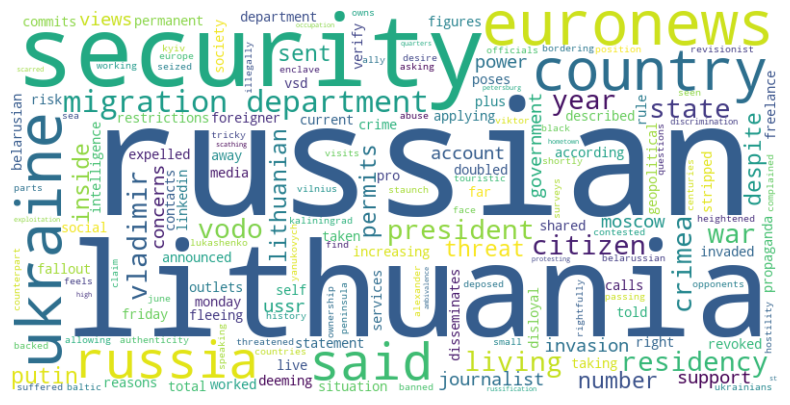

In [6]:
text = " ".join(tokens)

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


#### Distribution of common words in the article's sentences

In [9]:
def score_sentence_by_token(sentence, interesting_tokens): 
    """
    Calculates the score representing the proportion of interesting tokens found in a given sentence.

    Args:
        sentence (str): The input sentence to score.
        interesting_tokens (list): A list of interesting tokens to search for in the sentence.

    Returns:
        float or str: The score, which is the number of interesting lemmas found divided by the number of words in the sentence. If no interesting lemmas are found, the string 'No lemmas found' is returned.

    Raises:
        None

    """
    sentence_length = len(sentence.split())
    interesting_token = [token[0] for token in interesting_tokens]
    sentence = re.sub(r'[^\w\s]', '', sentence)
    counter = 0
    for _ in sentence.lower().split():
        if _ in interesting_token:
            counter+=1
    if counter>0:
        score = counter/sentence_length
        return score
    else:
        return 'No tokens found'

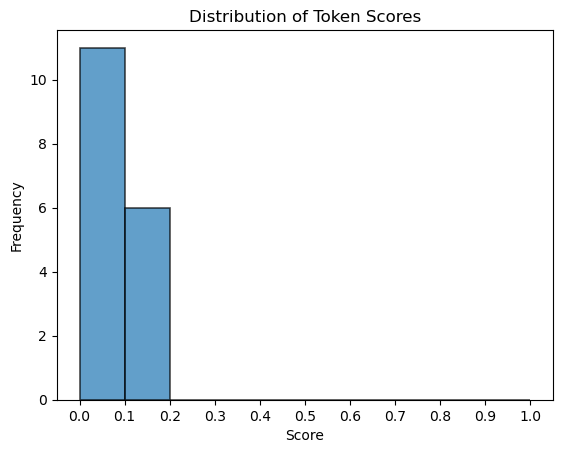

In [72]:
sentences = [sent.text.strip() for sent in doc.sents if sent.text.strip()]
tokens_hist_values = [score_sentence_by_token(sentence, most_common_tokens) for sentence in sentences if score_sentence_by_token(sentence, most_common_tokens) != 'No tokens found']
plt.hist(tokens_hist_values, bins=10, range=(0, 1),edgecolor='black', linewidth=1.2,alpha=0.7)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Token Scores')

plt.show();

#### Summarize the article with one sentence

In [8]:
# Initialize the tokenizer
tokenizer = Tokenizer("english")
tokenizer_sentence_segment = sent_tokenize

# Initialize the summarizer
parser = HtmlParser.from_string(article_text, tokenizer_sentence_segment, tokenizer)
summarizer = LexRankSummarizer()

# Generate the summary
summary = summarizer(parser.document, 1)  

# Print the summary
for sentence in summary:
    print(sentence)









Many Lithuanians are scathing of Russia, scarred by what they call the occupation, exploitation and Russification of their country under the USSR, though there is ambivalence in some quarters.


In [4]:
!jupyter nbconvert --to html custom_we_scraping_final_project.ipynb

[NbConvertApp] Converting notebook custom_we_scraping_final_project.ipynb to html
[NbConvertApp] Writing 1082680 bytes to custom_we_scraping_final_project.html
